In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Downloads\Comprehensive_Banking_Database.csv")

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

customer_id                          0
first_name                           0
last_name                            0
age                                  0
gender                               0
address                              0
city                                 0
contact_number                       0
email                                0
account_type                         0
account_balance                      0
date_of_account_opening              0
last_transaction_date                0
transactionid                        0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
account_balance_after_transaction    0
branch_id                            0
loan_id                              0
loan_amount                          0
loan_type                            0
interest_rate                        0
loan_term                            0
approval/rejection_date              0
loan_status              

In [8]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [10]:
date_cols = [
    "transaction_date",
    "account_opening_date",
    "last_payment_date",
    "payment_due_date",
    "feedback_date"
]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")


In [11]:
money_cols = [
    "transaction_amount",
    "account_balance",
    "loan_amount",
    "credit_card_balance",
    "credit_limit",
    "minimum_payment_due",
    "interest_rate"
]

for col in money_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [12]:
for col in money_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])


In [13]:
if "credit_card_balance" in df.columns and "credit_limit" in df.columns:
    df["credit_utilization_pct"] = (df["credit_card_balance"] / df["credit_limit"]) * 100

In [14]:
if "age" in df.columns:
    df["age_group"] = pd.cut(
        df["age"],
        bins=[18,25,35,45,55,65,100],
        labels=["18-25","26-35","36-45","46-55","56-65","65+"]
    )


In [15]:
if "transaction_date" in df.columns:
    df["transaction_year"] = df["transaction_date"].dt.year
    df["transaction_month"] = df["transaction_date"].dt.month


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   customer_id                        5000 non-null   int64         
 1   first_name                         5000 non-null   object        
 2   last_name                          5000 non-null   object        
 3   age                                5000 non-null   int64         
 4   gender                             5000 non-null   object        
 5   address                            5000 non-null   object        
 6   city                               5000 non-null   object        
 7   contact_number                     5000 non-null   int64         
 8   email                              5000 non-null   object        
 9   account_type                       5000 non-null   object        
 10  account_balance                    5

,customer_id,age,contact_number,account_balance,transactionid,transaction_date,transaction_amount,account_balance_after_transaction,branch_id,loan_id,...,credit_card_balance,minimum_payment_due,payment_due_date,rewards_points,feedback_id,feedback_date,anomaly,credit_utilization_pct,transaction_year,transaction_month
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.0,5000.000000
mean,2500.500000,43.469800,1.945880e+10,5060.570918,2500.500000,2023-06-30 09:21:01.440000256,2508.501144,5037.418898,50.586800,2500.500000,...,2487.40084,124.370134,2023-06-30 18:41:45.600000,4966.161800,2500.500000,2023-07-04 06:37:09.120000,0.880000,63.240760,2023.0,6.479400
min,1.000000,18.000000,1.945879e+10,107.200000,1.000000,2023-01-01 00:00:00,10.570000,-4878.760000,1.000000,1.000000,...,1.45000,0.070000,2023-01-01 00:00:00,1.000000,1.000000,2023-01-01 00:00:00,-1.000000,0.029797,2023.0,1.000000
25%,1250.750000,30.000000,1.945880e+10,2582.777500,1250.750000,2023-04-01 00:00:00,1241.150000,2047.205000,26.000000,1250.750000,...,1243.51750,62.180000,2023-03-28 00:00:00,2475.250000,1250.750000,2023-04-07 00:00:00,1.000000,22.788718,2023.0,4.000000
50%,2500.500000,43.000000,1.945880e+10,5075.500000,2500.500000,2023-06-30 00:00:00,2494.025000,5089.785000,50.000000,2500.500000,...,2461.62000,123.080000,2023-07-02 00:00:00,4950.500000,2500.500000,2023-07-06 00:00:00,1.000000,44.226336,2023.0,6.000000
75%,3750.250000,57.000000,1.945880e+10,7509.760000,3750.250000,2023-09-27 00:00:00,3796.222500,8036.367500,75.000000,3750.250000,...,3722.58000,186.125000,2023-10-01 00:00:00,7483.250000,3750.250000,2023-10-03 00:00:00,1.000000,76.070623,2023.0,9.000000
max,5000.000000,69.000000,1.945880e+10,9998.110000,5000.000000,2023-12-31 00:00:00,4998.390000,14911.380000,99.000000,5000.000000,...,4997.11000,249.860000,2023-12-31 00:00:00,9999.000000,5000.000000,2023-12-31 00:00:00,1.000000,472.568974,2023.0,12.000000
std,1443.520003,15.145672,1.443520e+03,2849.356481,1443.520003,NaN,1450.194986,4053.220017,28.499539,1443.520003,...,1446.80295,72.340102,NaN,2901.410915,1443.520003,NaN,0.475021,65.911905,0.0,3.420572


In [19]:
df.to_csv(r"C:\Users\Shaky\Desktop\cleaned_banking_data.csv", index=False)

# Exploratory Data Analysis (EDA)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [21]:
df = pd.read_csv("Desktop\cleaned_banking_data.csv")

df.head()


,customer_id,first_name,last_name,age,gender,address,city,contact_number,email,account_type,...,feedback_id,feedback_date,feedback_type,resolution_status,resolution_date,anomaly,credit_utilization_pct,age_group,transaction_year,transaction_month
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,1,2023-10-06,Suggestion,Resolved,1/22/2023,1,260.335581,36-45,2023,12
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,2,2023-04-07,Complaint,Resolved,8/27/2023,1,47.611373,46-55,2023,4
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,3,2023-09-07,Praise,Pending,5/11/2023,1,53.040753,18-25,2023,4
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,4,2023-05-28,Complaint,Resolved,7/5/2023,1,209.198274,46-55,2023,7
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,5,2023-02-12,Complaint,Resolved,11/21/2023,1,0.930098,65+,2023,1


In [22]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.info()

Shape: (5000, 44)

Columns:
 Index(['customer_id', 'first_name', 'last_name', 'age', 'gender', 'address',
       'city', 'contact_number', 'email', 'account_type', 'account_balance',
       'date_of_account_opening', 'last_transaction_date', 'transactionid',
       'transaction_date', 'transaction_type', 'transaction_amount',
       'account_balance_after_transaction', 'branch_id', 'loan_id',
       'loan_amount', 'loan_type', 'interest_rate', 'loan_term',
       'approval/rejection_date', 'loan_status', 'cardid', 'card_type',
       'credit_limit', 'credit_card_balance', 'minimum_payment_due',
       'payment_due_date', 'last_credit_card_payment_date', 'rewards_points',
       'feedback_id', 'feedback_date', 'feedback_type', 'resolution_status',
       'resolution_date', 'anomaly', 'credit_utilization_pct', 'age_group',
       'transaction_year', 'transaction_month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44

In [23]:
df.describe()

,customer_id,age,contact_number,account_balance,transactionid,transaction_amount,account_balance_after_transaction,branch_id,loan_id,loan_amount,...,cardid,credit_limit,credit_card_balance,minimum_payment_due,rewards_points,feedback_id,anomaly,credit_utilization_pct,transaction_year,transaction_month
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000
mean,2500.500000,43.469800,1.945880e+10,5060.570918,2500.500000,2508.501144,5037.418898,50.586800,2500.500000,25501.042806,...,2500.500000,5549.035830,2487.40084,124.370134,4966.161800,2500.500000,0.880000,63.240760,2023.0,6.479400
std,1443.520003,15.145672,1.443520e+03,2849.356481,1443.520003,1450.194986,4053.220017,28.499539,1443.520003,14039.732628,...,1443.520003,2581.718105,1446.80295,72.340102,2901.410915,1443.520003,0.475021,65.911905,0.0,3.420572
min,1.000000,18.000000,1.945879e+10,107.200000,1.000000,10.570000,-4878.760000,1.000000,1.000000,1006.370000,...,1.000000,1007.000000,1.45000,0.070000,1.000000,1.000000,-1.000000,0.029797,2023.0,1.000000
25%,1250.750000,30.000000,1.945880e+10,2582.777500,1250.750000,1241.150000,2047.205000,26.000000,1250.750000,13315.305000,...,1250.750000,3314.065000,1243.51750,62.180000,2475.250000,1250.750000,1.000000,22.788718,2023.0,4.000000
50%,2500.500000,43.000000,1.945880e+10,5075.500000,2500.500000,2494.025000,5089.785000,50.000000,2500.500000,25909.705000,...,2500.500000,5567.485000,2461.62000,123.080000,4950.500000,2500.500000,1.000000,44.226336,2023.0,6.000000
75%,3750.250000,57.000000,1.945880e+10,7509.760000,3750.250000,3796.222500,8036.367500,75.000000,3750.250000,37441.570000,...,3750.250000,7786.040000,3722.58000,186.125000,7483.250000,3750.250000,1.000000,76.070623,2023.0,9.000000
max,5000.000000,69.000000,1.945880e+10,9998.110000,5000.000000,4998.390000,14911.380000,99.000000,5000.000000,49993.490000,...,5000.000000,9997.780000,4997.11000,249.860000,9999.000000,5000.000000,1.000000,472.568974,2023.0,12.000000


In [24]:
df.isnull().sum()

customer_id                           0
first_name                            0
last_name                             0
age                                   0
gender                                0
address                               0
city                                  0
contact_number                        0
email                                 0
account_type                          0
account_balance                       0
date_of_account_opening               0
last_transaction_date                 0
transactionid                         0
transaction_date                      0
transaction_type                      0
transaction_amount                    0
account_balance_after_transaction     0
branch_id                             0
loan_id                               0
loan_amount                           0
loan_type                             0
interest_rate                         0
loan_term                             0
approval/rejection_date               0


In [25]:
df[df['age_group'].isnull()]['age'].value_counts().head(10)

age
18    90
Name: count, dtype: int64

In [26]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18,25,35,45,55,65,100],
    labels=["18-25","26-35","36-45","46-55","56-65","65+"],
    include_lowest=True
)

In [27]:
df['age_group'].isnull().sum()

0

In [28]:
total_volume = df['transaction_amount'].sum()
avg_transaction = df['transaction_amount'].mean()

print("Total Transaction Volume:", total_volume)
print("Average Transaction:", avg_transaction)


Total Transaction Volume: 12542505.719999999
Average Transaction: 2508.501144


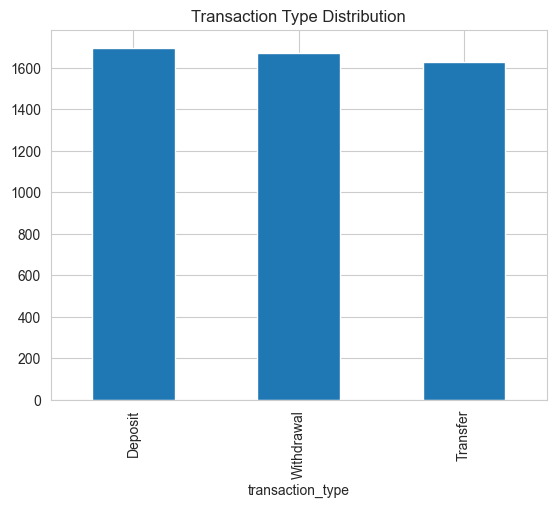

In [29]:
df['transaction_type'].value_counts()

df['transaction_type'].value_counts().plot(
    kind='bar', title="Transaction Type Distribution"
)
plt.show()


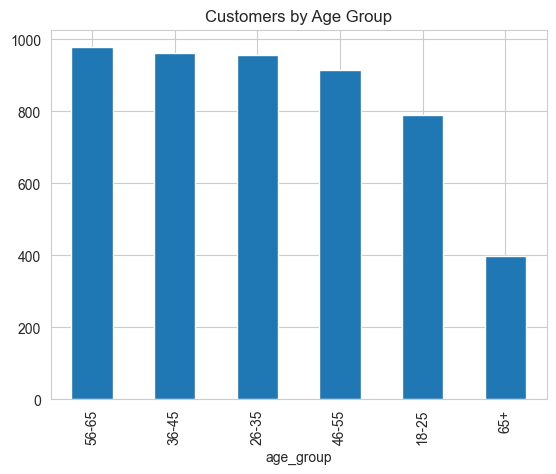

In [30]:
df['age_group'].value_counts().plot(
    kind='bar', title="Customers by Age Group"
)
plt.show()


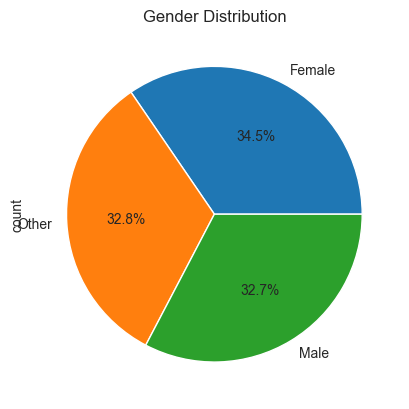

In [31]:
df['gender'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', title="Gender Distribution"
)
plt.show()


C:\Users\shaky\AppData\Local\Temp\ipykernel_23524\78011265.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['account_balance'].mean().plot(


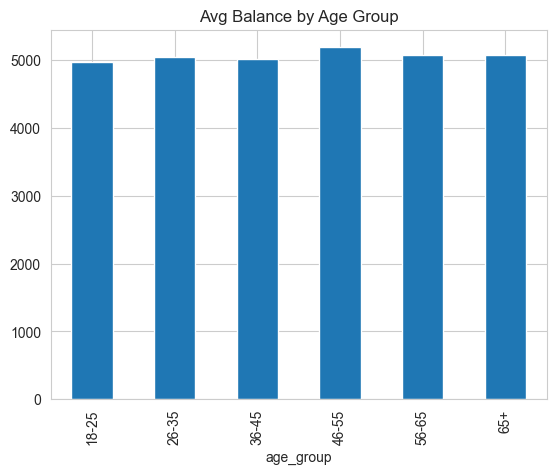

In [32]:
df.groupby('age_group')['account_balance'].mean().plot(
    kind='bar', title="Avg Balance by Age Group"
)
plt.show()


In [33]:
df['credit_utilization_pct'].describe()


count    5000.000000
mean       63.240760
std        65.911905
min         0.029797
25%        22.788718
50%        44.226336
75%        76.070623
max       472.568974
Name: credit_utilization_pct, dtype: float64

In [34]:
high_util = df[df['credit_utilization_pct'] > 80]

print("High Utilization Customers:", len(high_util))

High Utilization Customers: 1173


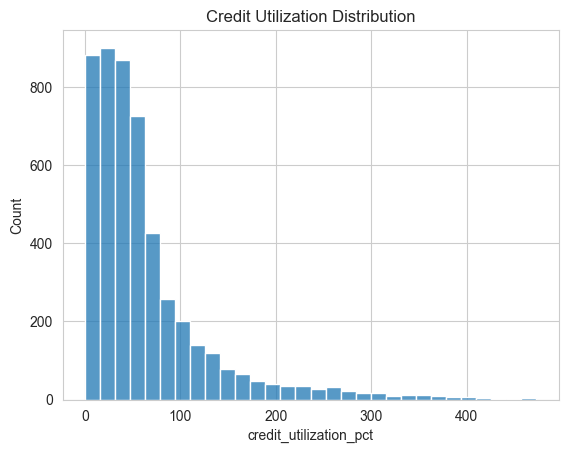

In [35]:
sns.histplot(df['credit_utilization_pct'], bins=30)
plt.title("Credit Utilization Distribution")
plt.show()


In [36]:
print("Total Loan Amount:", df['loan_amount'].sum())


Total Loan Amount: 127505214.03


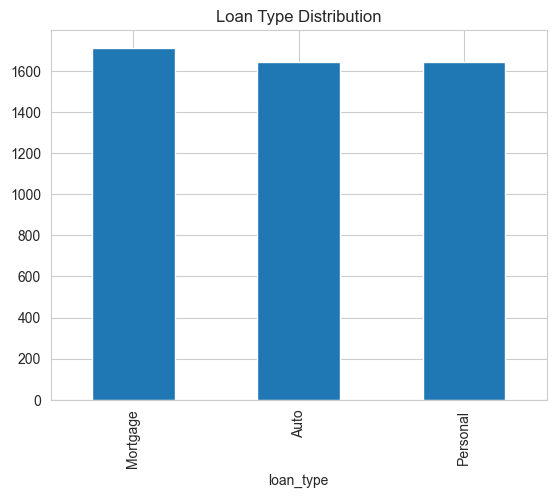

In [37]:
df['loan_type'].value_counts().plot(
    kind='bar', title="Loan Type Distribution"
)
plt.show()


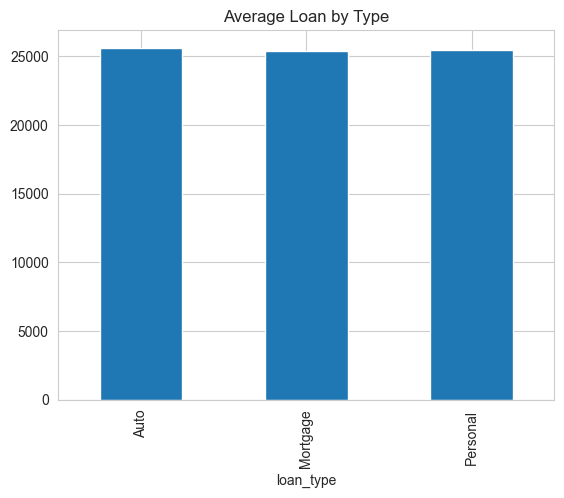

In [38]:
df.groupby('loan_type')['loan_amount'].mean().plot(
    kind='bar', title="Average Loan by Type"
)
plt.show()


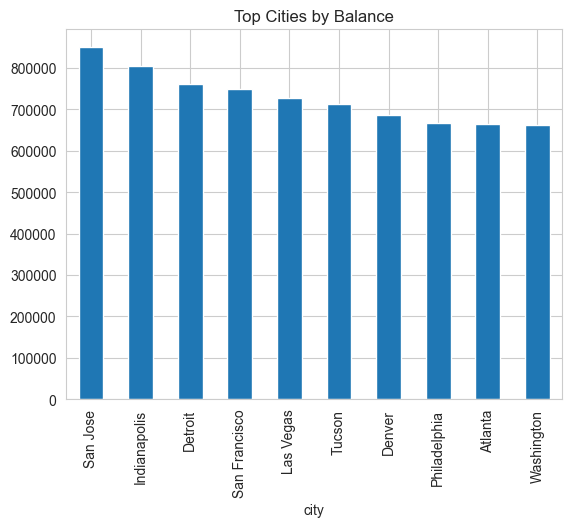

In [39]:
top_cities = df.groupby('city')['account_balance'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar', title="Top Cities by Balance")
plt.show()


In [40]:
df['anomaly'].value_counts()


anomaly
 1    4700
-1     300
Name: count, dtype: int64

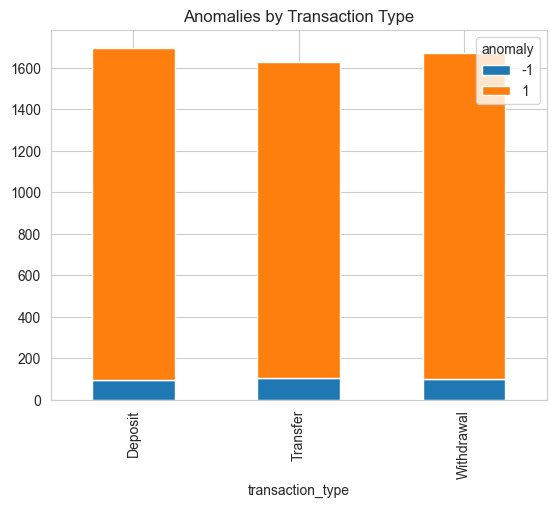

In [41]:
pd.crosstab(df['transaction_type'], df['anomaly']).plot(kind='bar', stacked=True)
plt.title("Anomalies by Transaction Type")
plt.show()


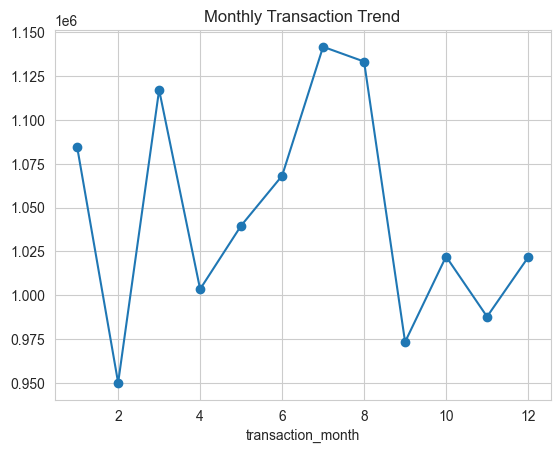

In [42]:
monthly = df.groupby('transaction_month')['transaction_amount'].sum()

monthly.plot(kind='line', marker='o', title="Monthly Transaction Trend")
plt.show()


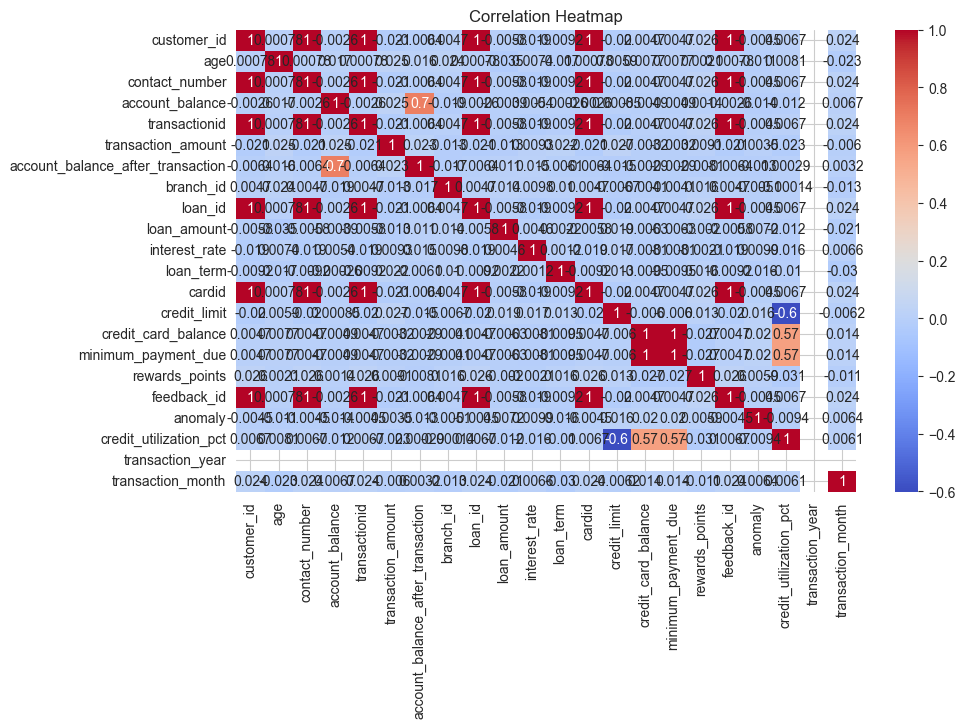

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
